In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
print ('输入数据:',mnist.train.images)
print ('输入数据打shape:',mnist.train.images.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打shape: (55000, 784)


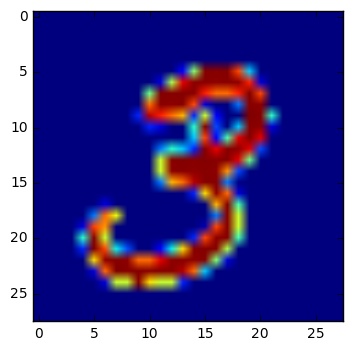

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)


In [3]:
import pylab 
im = mnist.train.images[1]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()


print ('输入数据打shape:',mnist.test.images.shape)
print ('输入数据打shape:',mnist.validation.images.shape)

In [4]:
import tensorflow as tf #导入tensorflow库

def max_out(inputs, num_units, axis=None):
    shape = inputs.get_shape().as_list()
    if shape[0] is None:
        shape[0] = -1
    if axis is None:  # Assume that channel is the last dimension
        axis = -1
    num_channels = shape[axis]
    if num_channels % num_units:
        raise ValueError('number of features({}) is not '
                         'a multiple of num_units({})'.format(num_channels, num_units))
    shape[axis] = num_units
    shape += [num_channels // num_units]
    outputs = tf.reduce_max(tf.reshape(inputs, shape), -1, keep_dims=False)
    return outputs

In [5]:
tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.int32, [None]) # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 100]))
b = tf.Variable(tf.zeros([100]))


z= tf.matmul(x, W) + b

#maxout = tf.reduce_max(z,axis= 1,keep_dims=True)
maxout= max_out(z, 50)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
# Set model weights
W2 = tf.Variable(tf.truncated_normal([50, 10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))
# 构建模型
#pred = tf.nn.softmax(tf.matmul(maxout, W2) + b2)
pred = tf.matmul(maxout, W2) + b2
# 构建模型
#pred = tf.nn.softmax(z) # Softmax分类

# Minimize error using cross entropy
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=pred))

#参数设置
learning_rate = 0.04
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


training_epochs = 200
batch_size = 100
display_step = 1


# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())# Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print( " Finished!")

Epoch: 0001 cost= 1.537337999
Epoch: 0002 cost= 0.835882390
Epoch: 0003 cost= 0.694976361
Epoch: 0004 cost= 0.621857883
Epoch: 0005 cost= 0.573555355
Epoch: 0006 cost= 0.547053131
Epoch: 0007 cost= 0.523276315
Epoch: 0008 cost= 0.500083595
Epoch: 0009 cost= 0.486573183
Epoch: 0010 cost= 0.469804658
Epoch: 0011 cost= 0.456827385
Epoch: 0012 cost= 0.446888305
Epoch: 0013 cost= 0.436658231
Epoch: 0014 cost= 0.429673109
Epoch: 0015 cost= 0.419850975
Epoch: 0016 cost= 0.410280153
Epoch: 0017 cost= 0.404000725
Epoch: 0018 cost= 0.395801871
Epoch: 0019 cost= 0.389817674
Epoch: 0020 cost= 0.383135452
Epoch: 0021 cost= 0.379535635
Epoch: 0022 cost= 0.372551273
Epoch: 0023 cost= 0.366221470
Epoch: 0024 cost= 0.362781868
Epoch: 0025 cost= 0.356285556
Epoch: 0026 cost= 0.353725188
Epoch: 0027 cost= 0.348297905
Epoch: 0028 cost= 0.343166286
Epoch: 0029 cost= 0.338519437
Epoch: 0030 cost= 0.335575400
Epoch: 0031 cost= 0.331301696
Epoch: 0032 cost= 0.328553503
Epoch: 0033 cost= 0.325185610
Epoch: 003